# <center> PCA based Face Recognition </center>

We will use the <b>ORL database</b>, available to anyone on <a href="http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html"> AT&T’s web site</a>. This database contains images showing the faces of 40 people. Each one of them was photographed 10 times. These photos are stored as images in grey levels with 112x92 pixels. In our example, we constructed a <b>catalog called orlfaces</b>, comprised of the catalogs named $s_1, s_2, . . . , s_{40}$, each one of them containing the 10 images we are going to process. The data has been split in two parts train and test. For each catalog we use the first 9 photos for training and the last photo for test.

In [1]:
import numpy as np
import PIL.Image as img
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (17.0, 5.0)
matplotlib.rcParams['font.size'] = 15

1- Load the training data?

In [29]:
trainimgs = np.empty([360, 112, 92], np.float32)
trainlabels = np.empty(360, np.int32)
for i in range(40):
    for j in range(9):
        trainimgs[i * 9 + j,] = img.open("orl_faces/Train/s" + str(i + 1) + "/" + str(j+1) + ".pgm")
        trainlabels[i * 9 + j] = i

2- Display image example?

In [3]:
print("image size: ", trainimgs[1,].shape)

image size:  (112, 92)


trainims[ 125 ] : label :  13


(-0.5, 91.5, 111.5, -0.5)

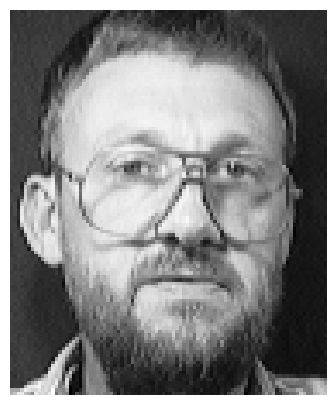

In [4]:
i = np.random.randint(trainimgs.shape[0])
print("trainims[", i, "] : label : ",  trainlabels[i])
plt.imshow(trainimgs[i,], cmap='Greys_r')
plt.axis('off')

3- Convert each image of shape (112 x 92) into a column vector of dimension (10304)?

(10304, 360)


(-0.5, 91.5, 111.5, -0.5)

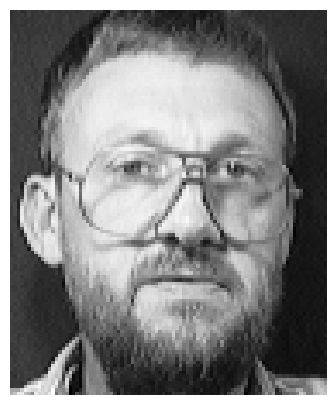

In [5]:
trainData = trainimgs.reshape(trainimgs.shape[0], -1).T
print(trainData.shape)
plt.imshow(trainData[:, i].reshape(112, 92), cmap='Greys_r')
plt.axis('off')

4- Using images of each of the 40 people in the training data, find a projection subspace $H$ which dimension is less than or equal to original dimension, and such as to have the maximum dispersion of the projections of training data. To extract this subspace, use PCA step which are described as follow:

    • Center the data.
    • Compute the correlation matrix.
    • Use SVD python function (np.linalg.svd)? (You can also use eig python function np.linalg.eigh)
    • Normalize the eigen vectors

(10304, 1)


(-0.5, 91.5, 111.5, -0.5)

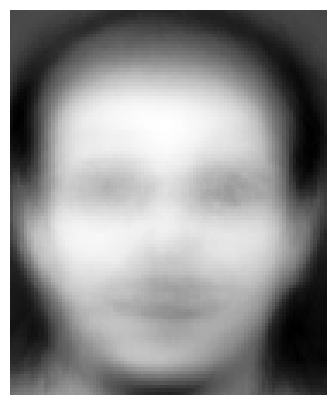

In [6]:
# compute and show the mean
M = np.mean(trainData, axis = 1).reshape(-1, 1)
print(M.shape)
plt.imshow(M.reshape(112, 92), cmap='Greys_r')
plt.axis('off')

In [7]:
# Compute the centered data
trainDataC = (trainData - M)/np.std(trainData, axis = 1).reshape(-1, 1)
# The mean of the centered data will be = 0 
print(np.mean(trainDataC, axis = 1),trainDataC.shape)

[-5.2650769e-08  1.4487240e-07 -1.6556846e-10 ... -3.6425061e-09
 -4.5945246e-08  1.3162692e-07] (10304, 360)


In [8]:
# Compute the Correlation matrix
Cor = np.cov(trainDataC.T)
Cor.shape

(360, 360)

In [9]:
# Compute Eigen vector and Eigen value 
# using np.linealg.eigh or np.linalg.svd
eiv, eivt = np.linalg.eigh(Cor)
print(f'First 10 eigenvalues: {eiv[:10]}')

First 10 eigenvalues: [2.43407711e-12 2.80150903e-02 2.88576853e-02 3.15178519e-02
 3.32944687e-02 3.54010648e-02 3.69093778e-02 3.95456346e-02
 4.00788702e-02 4.17705481e-02]


In [10]:
# Re-order Eigen-Values and Eigen-Vectors
inx = np.argsort(eiv)[::-1]
eiv = eiv[inx]
eivt = eivt[:, inx]
print(f'First 10 eigenvalues: {eiv[:10]}')

First 10 eigenvalues: [45.91454687 29.77890161 23.21880333 20.29532186 12.09311014  9.86846363
  8.70611932  7.77390958  7.37113417  5.33115979]


5- Plot the eigenvalues?

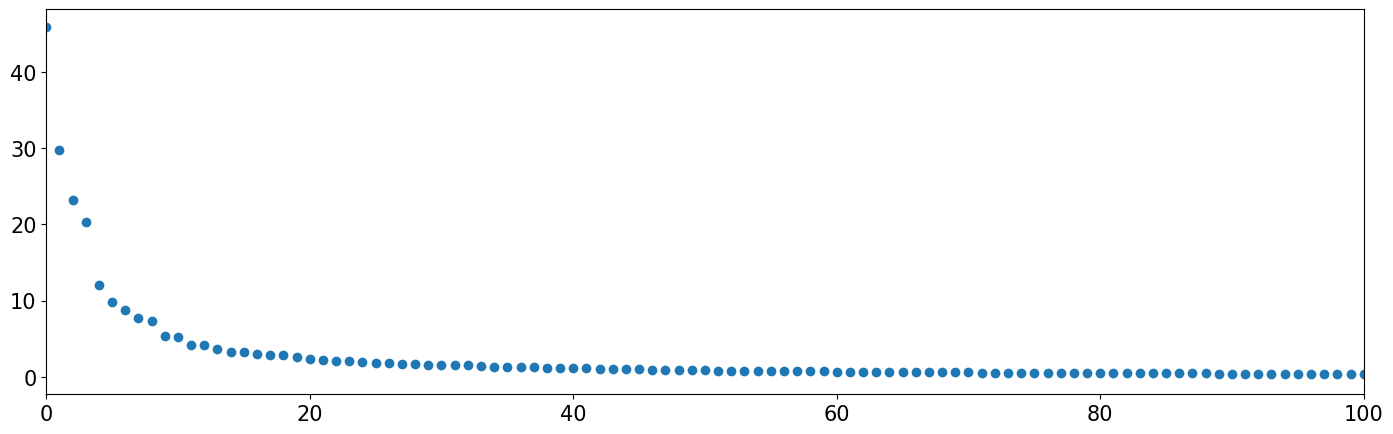

In [11]:
plt.plot(eiv, 'o')
plt.xlim([0, 100])
plt.show()

6- Plot the first 3 eigen faces and last eigen face (i.e., eigen vectors)?

(10304, 360)


(-0.5, 91.5, 111.5, -0.5)

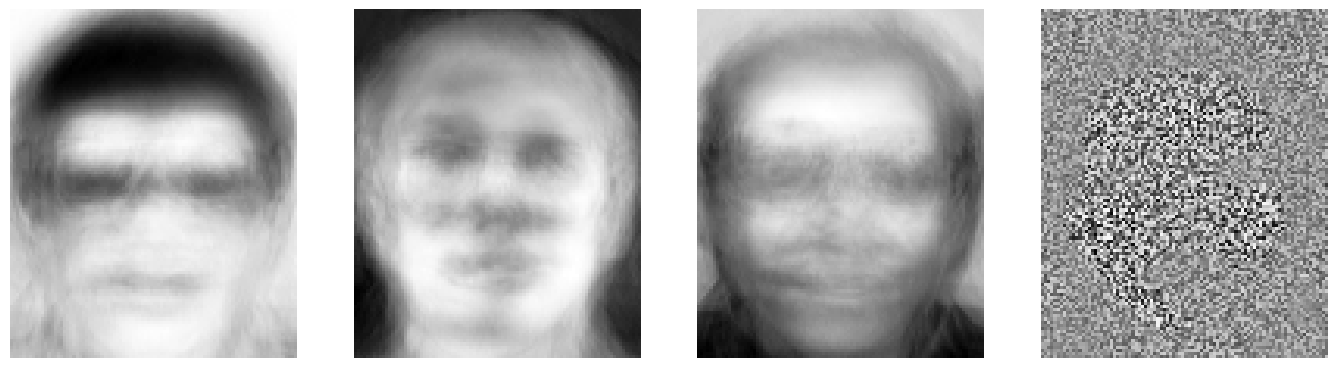

In [12]:
w = trainDataC @ eivt
print(w.shape)
for ind in range(3):
    plt.subplot(1,4,ind + 1)
    plt.imshow(w[:,ind].reshape(112, 92), cmap='Greys_r')
    plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(w[:,-1].reshape(112, 92), cmap='Greys_r')
plt.axis('off')

7- Reconstruct one face example with its 10, 20, 30, or 40 eigenvectors. Plot and compare all the reconstructions. Also plot the original image, reconstructed image and difference between reconstruction and original image in each case. Write your observations?

In [13]:
x= trainDataC[:, i]
print(i, x , x.shape)

125 [-1.2463233 -1.2195671 -1.0908526 ...  1.3860955  1.8015728  1.7040102] (10304,)


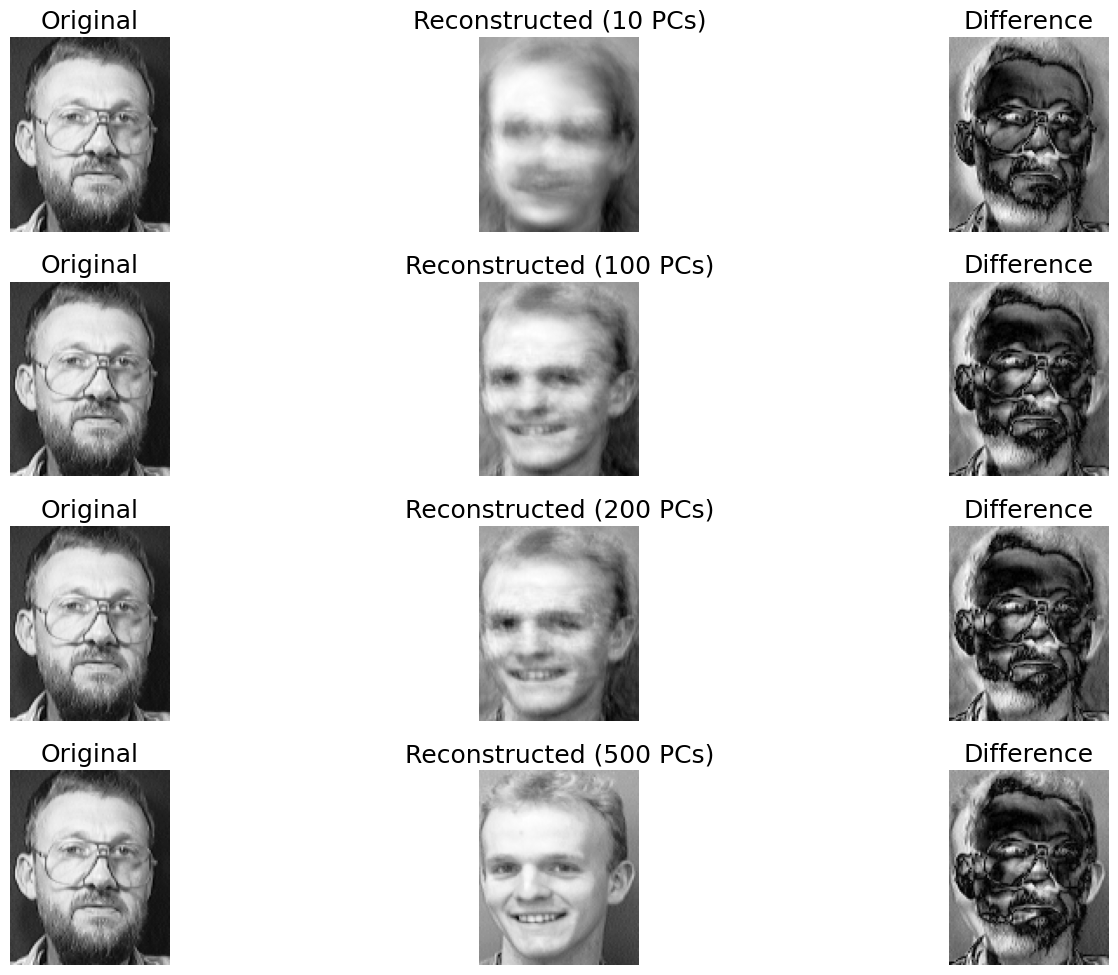

In [25]:
K = [10, 100, 200, 500]
x = (x.reshape(-1, 1)).reshape(112, 92)
plt.figure(figsize=(20, 10))
for idx, num in enumerate(K):
    r = M + np.std(trainData, axis = 1).reshape(-1, 1)*(w[:, :num] @ eivt[:, :num].T)[:, i].reshape(-1, 1)
    diff = np.abs(x - r.reshape(112, 92))
    
    plt.subplot(4, 4, idx * 4 + 1)
    plt.imshow(x, cmap='Greys_r')
    plt.title('Original')
    plt.axis('off')
    
    plt.subplot(4, 4, idx * 4 + 2)
    plt.imshow(r.reshape(112, 92), cmap='Greys_r')
    plt.title(f'Reconstructed ({num} PCs)')
    plt.axis('off')
    
    plt.subplot(4, 4, idx * 4 + 3)
    plt.imshow(diff, cmap='Greys_r')
    plt.title('Difference')
    plt.axis('off')

# Show plots
plt.tight_layout()
plt.show()


8- Load the test data?

In [30]:
testimgs = np.empty([360, 112, 92], np.float32)
testlabels = np.empty(360, np.int32)
for i in range(40):
    for j in range(9):
        trainimgs[i * 9 + j,] = img.open("orl_faces/Test/s" + str(i + 1) + "/" + str(10) + ".pgm")
        trainlabels[i * 9 + j] = i

9- Check the identity corresponding to each image in the test dataset by determining its
projection onto $H$ (with dimension 10, 20, 30 and 40) and then by comparing the distances of this projection with respect to all projections in the training data. For each test category find the closest category in the test?


10- Show the close image for test $s_1$ example.

11- How we can get better classification performances? 

In [15]:
# using Fisher Discriminant Analysis
...